In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spl

In [2]:
#Defining workspace
n = 512
size_grid = 10e-3
grid_pitch = size_grid/n
wave_length = 1e-6
wave_number = 2*np.pi /wave_length
propagation_distance = 20
x_axis = np.arange(-n/2, n/2)*grid_pitch

x_aperature, y_aperature = np.meshgrid(x_axis, x_axis)

#Creating the aperature
aperature_radius = 0.5e-3
aperature = np.float_(  np.sqrt(  x_aperature**2 + y_aperature**2 ) <= aperature_radius  )

In [3]:
#Creating our own dft function
def dft(input):
    input_dft = np.fft.fftshift(  np.fft.fft2(  np.fft.fftshift(  input  )  )  )
    return input_dft

In [4]:
x_far_field = np.arange(  -n/2, n/2  ) * wave_length * propagation_distance / n / grid_pitch

far_field = (  np.exp(  1j*wave_number*propagation_distance  ) * np.exp(  1j*wave_number*(x_aperature**2 + y_aperature**2) / 2 / propagation_distance  )  / 1j /wave_length / propagation_distance )*dft(aperature)

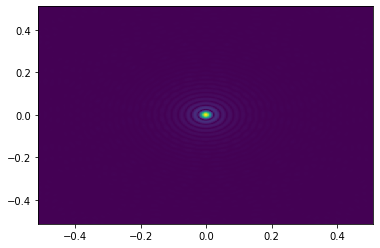

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.pcolorfast(  x_far_field, x_far_field, np.abs(  far_field  )  )

<ipython-input-6-f4b2ea3b5b93>:1: RuntimeWarning: divide by zero encountered in true_divide
  far_field_bessel = (  np.exp(  1j*wave_number*propagation_distance  ) * np.exp(  1j*wave_number*(x_aperature**2 + y_aperature**2) / 2 / propagation_distance  )  / 1j /wave_length / propagation_distance ) * aperature_radius * spl.j1(  2*np.pi*aperature_radius*np.sqrt( (x_aperature/ wave_length / propagation_distance)**2 + (y_aperature/ wave_length / propagation_distance)**2 ) / (x_aperature/ wave_length / propagation_distance)**2 + (y_aperature/ wave_length / propagation_distance)**2 )
<ipython-input-6-f4b2ea3b5b93>:1: RuntimeWarning: invalid value encountered in true_divide
  far_field_bessel = (  np.exp(  1j*wave_number*propagation_distance  ) * np.exp(  1j*wave_number*(x_aperature**2 + y_aperature**2) / 2 / propagation_distance  )  / 1j /wave_length / propagation_distance ) * aperature_radius * spl.j1(  2*np.pi*aperature_radius*np.sqrt( (x_aperature/ wave_length / propagation_distance)**2 + 

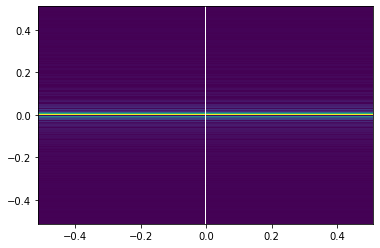

In [6]:
far_field_bessel = (  np.exp(  1j*wave_number*propagation_distance  ) * np.exp(  1j*wave_number*(x_aperature**2 + y_aperature**2) / 2 / propagation_distance  )  / 1j /wave_length / propagation_distance ) * aperature_radius * spl.j1(  2*np.pi*aperature_radius*np.sqrt( (x_aperature/ wave_length / propagation_distance)**2 + (y_aperature/ wave_length / propagation_distance)**2 ) / (x_aperature/ wave_length / propagation_distance)**2 + (y_aperature/ wave_length / propagation_distance)**2 )

fig = plt.figure()
ax = plt.axes()
ax.pcolorfast(  x_far_field, x_far_field, np.abs(  far_field_bessel  )  )